<a href="https://colab.research.google.com/github/KarltonBotics/Integrador_CentinelAI/blob/main/Avance4_Equipo58.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 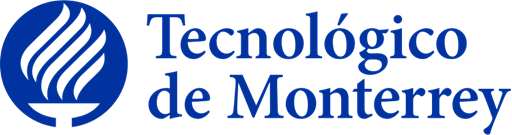


Maestría en Inteligencia Artificial Aplicada

Proyecto Integrador
Septiembre – Diciembre
2025

Actividad 4
Avance 4. Modelos alternativos

Docentes:

*  Dra. Grettel Barceló Alonso
*  Dra. Verónica Sandra Guzmán De Valle

Asesor:

*   Dr. Luis Eduardo Falcón

Alumno:
*   Carlos Enríquez Gorgonio
A01793102
  
Octubrebre 2025


##**SECCIÓN 1 PREPARACION Y COMPROBACIÓN DE DATASETS**<br>
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

Importacion de librerias generales de todo el proyec

In [1]:
import folium #Mapa
import geopandas as gpd
import lightgbm as lgb
import locale
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyproj
import re
import seaborn as sns
import unicodedata
import time #paRA LA TABLA DEL EJERCICIO 5

from google.colab import drive

from IPython.display import display, HTML

from scipy.stats import skew, chi2_contingency

from sklearn.cluster import DBSCAN
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error,accuracy_score, classification_report, precision_score, recall_score, f1_score,roc_auc_score, log_loss
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from statsmodels.tsa.seasonal import seasonal_decompose

from tabulate import tabulate

Carga de los DataSets

In [2]:
drive.mount('/content/drive')

#DataSet Principal
#file_path = '/mnt/DataSetFinal25_13_A.xlsx'
file_path = '/content/drive/MyDrive/DataSetFinal25_13_A.xlsx'
df = pd.read_excel(file_path, header=0,)
df.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,REGIMEN DE FUEGO,ARBOLADO ADULTO,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,Influido,0.0,0,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,Dependiente,0.0,1.7069,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,Dependiente,0.0,0,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,Dependiente,0.0,0,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,Dependiente,0.0,0,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,Dependiente,0.0,0.0853,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,Dependiente,0.0,1.0454,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,Dependiente,0.0,0,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,Dependiente,0.0,0,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,Dependiente,0.0,0.1054,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0


In [3]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO'],
      dtype='object')

In [4]:
df["NOMBRE MUNICIPIO"].unique()

array(['Pueblo Nuevo', 'Topia', 'Durango', 'Tepehuanes', 'Canelas',
       'Santiago Papasquiaro', 'San Dimas', 'Mezquital', 'Tamazula',
       'Guanaceví', 'El Oro', 'Otáez', 'Ocampo', 'Canatlán',
       'Nombre de Dios', 'Cuencamé', 'Súchil', 'Nuevo Ideal',
       'San Bernardo', nan, 'Lerdo', 'Vicente Guerrero', 'Nazas',
       'Mapimí', 'Poanas', 'San Pedro del Gallo', 'Peñón Blanco',
       'durango', 'SAN DIMAS', 'Canatlan', 'OTAEZ', 'Guanacevi',
       'CANELAS', 'OCAMPO', 'Suchil', 'TAMAZULA', 'DURANGO', 'MEZQUITAL',
       'TEPEHUANES', 'LERDO', 'PUEBLO NUEVO', 'SANTIAGO PAPASQUIARO',
       'GUANACEVI', 'TOPIA', 'CANATLAN', 'NUEVO IDEAL', 'NOMBRE DE DIOS',
       'CUENCAME', 'SUCHIL'], dtype=object)

In [5]:
#DataSet de Municipios y Coordenadas
#nombre_archivo = '/mnt/poblacion.csv'
nombre_archivo = '/content/drive/MyDrive/poblacion.csv'
df_c = pd.read_csv(nombre_archivo, encoding='utf-8')
df_c['municipio'] = df_c['municipio'].str.upper()
df_c= df_c[df_c['entidad'] == 'Durango'].copy()
df_c.head(10)

,clave_entidad,entidad,clave_municipio,municipio,longitud,latitud,poblacion
289,10,Durango,1,CANATLÁN,-104.464214,24.313815,31454
290,10,Durango,2,CANELAS,-106.324428,25.072270,4321
291,10,Durango,3,CONETO DE COMONFORT,-104.460810,24.584485,4084
292,10,Durango,4,CUENCAMÉ,-103.415446,24.521538,34955
293,10,Durango,5,DURANGO,-104.401270,24.012636,688697
294,10,Durango,6,GENERAL SIMÓN BOLÍVAR,-103.133351,24.412067,10038
295,10,Durango,7,GÓMEZ PALACIO,-103.294710,25.341239,372750
296,10,Durango,8,GUADALUPE VICTORIA,-104.072518,24.264716,36695
297,10,Durango,9,GUANACEVÍ,-105.571596,25.555398,9869
298,10,Durango,10,HIDALGO,-104.544852,26.150520,3843


In [6]:
df_c.columns

Index(['clave_entidad', 'entidad', 'clave_municipio', 'municipio', 'longitud',
       'latitud', 'poblacion'],
      dtype='object')

In [7]:
#------------------------------------------------------
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
dimensiones_c = df_c.shape
print(f"El DataFrame tiene: {dimensiones_c[0]} filas")
print(f"El DataFrame tiene: {dimensiones_c[1]} columnas")

#Para exportar
#df.to_excel('/mnt/validar.xlsx', index=False)


El DataFrame tiene: 3750 filas
El DataFrame tiene: 31 columnas
El DataFrame tiene: 39 filas
El DataFrame tiene: 7 columnas


Verificación de tamaños

#<mark>**RESPALDO DATASET**</mark>

In [8]:
df_Original = df

In [9]:
faltantes = df.isna().sum()

porcentaje_faltantes = (faltantes / len(df)) * 100

resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})

print(resultado)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   1             0.026667
FECHA DE REPORTE                 2618            69.813333
LONGITUD GRADOS                  2618            69.813333
LONGITUD MINUTOS                 2618            69.813333
LONGITUD SEGUNDOS                2618            69.813333
LATITUD GRADOS                   2618            69.813333
LATITUD MINUTOS                  2618            69.813333
LATITUD SEGUNDOS                 2615            69.733333
LATITUD                          2394            63.840000
LONGITUD                         2394            63.840000
COORDENADAS                      3060            81.600000
CLAVE MUNICIPIO                  2618            69.813333
NOMBRE MUNICIPIO                    2             0.053333
PREDIO O PARAJE                     2             0.053333
CAUSA DEL INCENDIO               2090            55.733333
CAUSA ESPECIFICA                 2097            55.9200

Desde el df_C o DataSet que contiene las coordenadas de los municipios del estado de durango, renombramos y añadimos al df original las columnas de "longitud_municipio" y "latitud_muunicipio

In [10]:
df_c = df_c[['municipio', 'longitud', 'latitud']].rename(columns={
    'municipio':'municipio',
    'longitud': 'longitud_municipio',
    'latitud': 'latitud_municipio'
})
#  Fusionar
df = pd.merge(
    df,
    df_c[['municipio', 'longitud_municipio', 'latitud_municipio']],
    left_on='NOMBRE MUNICIPIO',
    right_on='municipio',
    how='left'
)
# Eliminar 'municipio' redundante.
df = df.drop(columns=['municipio'])

In [11]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 33 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,longitud_municipio,latitud_municipio
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,0,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,1.7069,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,0,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,0.0853,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,1.0454,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,0,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.1054,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN


In [12]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'longitud_municipio',
       'latitud_municipio'],
      dtype='object')

#<mark>**RESPALDO DATASET**</mark>

In [13]:
df_Completo = df

In [14]:
faltantes = df.isna().sum()

porcentaje_faltantes = (faltantes / len(df)) * 100

resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})

print(resultado)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   1             0.026667
FECHA DE REPORTE                 2618            69.813333
LONGITUD GRADOS                  2618            69.813333
LONGITUD MINUTOS                 2618            69.813333
LONGITUD SEGUNDOS                2618            69.813333
LATITUD GRADOS                   2618            69.813333
LATITUD MINUTOS                  2618            69.813333
LATITUD SEGUNDOS                 2615            69.733333
LATITUD                          2394            63.840000
LONGITUD                         2394            63.840000
COORDENADAS                      3060            81.600000
CLAVE MUNICIPIO                  2618            69.813333
NOMBRE MUNICIPIO                    2             0.053333
PREDIO O PARAJE                     2             0.053333
CAUSA DEL INCENDIO               2090            55.733333
CAUSA ESPECIFICA                 2097            55.9200

##**SECCIÓN 2 CREACIÓN DE FUNCIONES PARA LOS PIPELINES**
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

#<mark style="background-color: #a0e8a0;">**FUNCIÓN convertir_fechas**</mark>

Estoa funcion convierte nuestras tres columnas de tipo fecha, en un formato homologado, ya que estas pueden contener fechas cortas o largas e incluso tiempo

In [15]:
print(df.dtypes)

CLAVE DE INCENDIO      object
FECHA DE REPORTE       object
LONGITUD GRADOS       float64
LONGITUD MINUTOS      float64
LONGITUD SEGUNDOS     float64
LATITUD GRADOS        float64
LATITUD MINUTOS       float64
LATITUD SEGUNDOS       object
LATITUD               float64
LONGITUD              float64
COORDENADAS            object
CLAVE MUNICIPIO       float64
NOMBRE MUNICIPIO       object
PREDIO O PARAJE        object
CAUSA DEL INCENDIO     object
CAUSA ESPECIFICA       object
FECHA INICIO           object
FECHA LIQUIDACION      object
TIPO DE INCENDIO       object
TIPO DE VEGETACION     object
ZONA BIOCLIMATICA      object
REGIMEN DE FUEGO       object
ARBOLADO ADULTO       float64
RENUEVO                object
ARBUSTIVO             float64
HERBACEO              float64
HOJARASCA             float64
ARBOREO               float64
SUELO ORGANICO        float64
TOTAL HA              float64
COSTO ESTIMADO        float64
longitud_municipio    float64
latitud_municipio     float64
dtype: obj

In [16]:
def convertir_fechas(df):
  columnas_a_convertir = ['FECHA INICIO', 'FECHA LIQUIDACION']
  for columna in columnas_a_convertir:
    if columna in df.columns:
      fechas_numericas = pd.to_datetime(
        pd.to_numeric(df[columna], errors='coerce'),
          unit='d', #o D en Mayuuscula
          origin='1899-12-30',
          #errors='coerce' #Esta cuando cauusa el error  d
        )
      fechas_texto = pd.to_datetime(df[columna], dayfirst=True, errors='coerce')
      df[columna] = fechas_numericas.fillna(fechas_texto)
      print(f"Columna '{columna}' convertida exitosamente.")
    else:
      print(f"Advertencia: La columna '{columna}' no se encontró en el DataFrame.")
    #df.dropna(subset=['FECHA INICIO'], inplace=True)
  return df

In [17]:
df = convertir_fechas(df)
#convertir_fechas(df)
print(df['FECHA INICIO'].isna().sum())  # número de NaT


Columna 'FECHA INICIO' convertida exitosamente.
Columna 'FECHA LIQUIDACION' convertida exitosamente.
9


In [18]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 33 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,RENUEVO,ARBUSTIVO,HERBACEO,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,longitud_municipio,latitud_municipio
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,0,38.5400,24.5254,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,1.7069,15.3622,10.2415,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0,1.1314,5.6571,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0,6.3044,12.6087,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,0,0.0000,0.0000,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,0.0853,0.2985,6.8236,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,1.0454,4.1818,4.1818,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,0,5.6731,16.3890,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0,0.0000,2.8940,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.1054,0.1580,2.3706,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN


In [19]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'longitud_municipio',
       'latitud_municipio'],
      dtype='object')

In [20]:
print(df['FECHA INICIO'].head(100))

0    2025-01-03
1    2025-01-06
2    2025-01-04
3    2025-01-20
4    2025-01-20
        ...    
95   2025-03-24
96   2025-03-24
97   2025-03-25
98   2025-03-24
99   2025-03-25
Name: FECHA INICIO, Length: 100, dtype: datetime64[ns]


#<mark>**RESPALDO DATASET**</mark>

In [21]:
df_Fechas = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN dividir_fechas**</mark>

Definimos una funcion para dividir la columna "FECHA INICIO", creando tres columnas DIA, MES y AÑO

In [22]:
# Crear columnas DIA, MES, AÑO
def dividir_fechas(df):
  df['DIA'] = df['FECHA INICIO'].dt.day
  df['MES'] = df['FECHA INICIO'].dt.month
  df['AÑO'] = df['FECHA INICIO'].dt.year
  return df

In [23]:
dividir_fechas(df)

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,longitud_municipio,latitud_municipio,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0000,NaN,-105.432281,25.203555,19.0,6.0,2013.0
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0000,NaN,NaN,3.0000,NaN,-105.555248,24.060785,20.0,6.0,2013.0
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0000,NaN,NaN,2.0000,NaN,-105.555248,24.060785,21.0,6.0,2013.0
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0000,NaN,-105.432281,25.203555,21.0,6.0,2013.0


In [24]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 36 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,longitud_municipio,latitud_municipio,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0


In [25]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'longitud_municipio', 'latitud_municipio',
       'DIA', 'MES', 'AÑO'],
      dtype='object')

In [26]:
print(df['AÑO'].head(100))

0     2025.0
1     2025.0
2     2025.0
3     2025.0
4     2025.0
       ...  
95    2025.0
96    2025.0
97    2025.0
98    2025.0
99    2025.0
Name: AÑO, Length: 100, dtype: float64


In [27]:
conteo = df['AÑO'].value_counts().sort_index()  # Cuenta los valores y los ordena por año
print(conteo)

AÑO
2012.0      2
2013.0    229
2014.0    198
2015.0     64
2016.0    254
2017.0    508
2018.0    325
2019.0    252
2020.0    245
2021.0    263
2022.0    269
2023.0    347
2024.0    371
2025.0    414
Name: count, dtype: int64


#<mark>**RESPALDO DATASET**</mark>

df_DiaMesAno = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN convertir_mayusculas**</mark>

Primero definimos una funcion que convierte a mayusculas todos los encabezados de nuestro dataset y tambien todos los registros.

In [28]:
def convertir__mayusculas(df):
  #Encabezados
  df.columns = df.columns.str.upper()
  columnas_mayus = [
    'NOMBRE MUNICIPIO',
    'PREDIO O PARAJE',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION'
  ]

  for col in columnas_mayus:
    if col in df.columns:
        df[col] = df[col].astype(str).str.upper()
  return df

In [29]:
convertir__mayusculas(df)

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0000,NaN,-105.432281,25.203555,19.0,6.0,2013.0
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0000,NaN,NaN,3.0000,NaN,-105.555248,24.060785,20.0,6.0,2013.0
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0000,NaN,NaN,2.0000,NaN,-105.555248,24.060785,21.0,6.0,2013.0
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0000,NaN,-105.432281,25.203555,21.0,6.0,2013.0


In [30]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 36 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0


In [31]:
df.columns

Index(['CLAVE DE INCENDIO', 'FECHA DE REPORTE', 'LONGITUD GRADOS',
       'LONGITUD MINUTOS', 'LONGITUD SEGUNDOS', 'LATITUD GRADOS',
       'LATITUD MINUTOS', 'LATITUD SEGUNDOS', 'LATITUD', 'LONGITUD',
       'COORDENADAS', 'CLAVE MUNICIPIO', 'NOMBRE MUNICIPIO', 'PREDIO O PARAJE',
       'CAUSA DEL INCENDIO', 'CAUSA ESPECIFICA', 'FECHA INICIO',
       'FECHA LIQUIDACION', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION',
       'ZONA BIOCLIMATICA', 'REGIMEN DE FUEGO', 'ARBOLADO ADULTO', 'RENUEVO',
       'ARBUSTIVO', 'HERBACEO', 'HOJARASCA', 'ARBOREO', 'SUELO ORGANICO',
       'TOTAL HA', 'COSTO ESTIMADO', 'LONGITUD_MUNICIPIO', 'LATITUD_MUNICIPIO',
       'DIA', 'MES', 'AÑO'],
      dtype='object')

#<mark>**RESPALDO DATASET**</mark>

In [32]:
df_Mayusculas = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN quitar_acentos**</mark>

In [33]:
columnas_a_limpias = [
    'NOMBRE MUNICIPIO',
    'PREDIO O PARAJE',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION'
]

def limpiar_texto(texto):
    if pd.isna(texto):
        return texto
    texto = str(texto)
    texto = ''.join(
        c for c in unicodedata.normalize('NFD', texto)
        if unicodedata.category(c) != 'Mn'
    )
    texto = re.sub(r'[^A-Za-z0-9\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto


for col in columnas_a_limpias:
    if col in df.columns:
        df[col] = df[col].apply(limpiar_texto)

In [34]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 36 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0


#<mark>**RESPALDO DATASET**</mark>

In [35]:
df_Acentos = df

In [36]:
faltantes = df.isna().sum()

porcentaje_faltantes = (faltantes / len(df)) * 100

resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})

print(resultado)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   1             0.026667
FECHA DE REPORTE                 2618            69.813333
LONGITUD GRADOS                  2618            69.813333
LONGITUD MINUTOS                 2618            69.813333
LONGITUD SEGUNDOS                2618            69.813333
LATITUD GRADOS                   2618            69.813333
LATITUD MINUTOS                  2618            69.813333
LATITUD SEGUNDOS                 2615            69.733333
LATITUD                          2394            63.840000
LONGITUD                         2394            63.840000
COORDENADAS                      3060            81.600000
CLAVE MUNICIPIO                  2618            69.813333
NOMBRE MUNICIPIO                    0             0.000000
PREDIO O PARAJE                     0             0.000000
CAUSA DEL INCENDIO                  0             0.000000
CAUSA ESPECIFICA                    0             0.0000

#<mark style="background-color: #a0e8a0;">**FUNCIÓN eliminar_filas_vacias**</mark>

Como ya se tienen definidas las caracteristicas principales, podemos eliminar las columnas que no tengan datos en dichas columnas determinadas, dejamos la variable configurable por si se requiere adaptar

In [37]:
def eliminar_filas_vacias(df):
  # Definición las columnas
  columnas_de_interes = ['FECHA INICIO', 'NOMBRE MUNICIPIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO','TIPO DE VEGETACION', 'TOTAL HA']
  df_filas_sin_datos = df[df[columnas_de_interes].isna().any(axis=1)]
  # Eliminamos, pero respaldamos
  if not df_filas_sin_datos.empty:
    print(f"Se encontraron {len(df_filas_sin_datos)} filas con datos faltantes.")
  else:
    print("No se encontraron filas con datos faltantes.")
  # Eliminamos del DataSet Original
  df = df.dropna(subset=columnas_de_interes)
  return df, df_filas_sin_datos

In [38]:
eliminar_filas_vacias(df)

Se encontraron 9 filas con datos faltantes.


(     CLAVE DE INCENDIO FECHA DE REPORTE  LONGITUD GRADOS  LONGITUD MINUTOS  \
 0           25-10-0001     45860.631944            105.0               2.0   
 1           25-10-0002     45859.993056            106.0              16.0   
 2           25-10-0003     45839.534028            104.0              42.0   
 3           25-10-0004     45771.443056            104.0              41.0   
 4           25-10-0005     45860.618056            105.0              19.0   
 ...                ...              ...              ...               ...   
 3745         13-10-227              NaN              NaN               NaN   
 3746         13-10-228              NaN              NaN               NaN   
 3747         13-10-229              NaN              NaN               NaN   
 3748         13-10-230              NaN              NaN               NaN   
 3749         13-10-231              NaN              NaN               NaN   
 
       LONGITUD SEGUNDOS  LATITUD GRADOS  LATITUD 

In [39]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)
#df_filas_sin_datos.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 36 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,HOJARASCA,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,42.0436,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,17.0692,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0.0000,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0.0000,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,22.7810,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,6.4397,NaN,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,11.4999,NaN,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,9.4552,NaN,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0.2516,NaN,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0.3161,NaN,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0


COMPROBACIÓN DE DATOS FALTANTES

In [40]:
faltantes = df.isna().sum()
porcentaje_faltantes = (faltantes / len(df)) * 100
resultado = pd.DataFrame({
    'Cantidad faltante': faltantes,
    'Porcentaje faltante': porcentaje_faltantes
})
print(resultado)

                    Cantidad faltante  Porcentaje faltante
CLAVE DE INCENDIO                   1             0.026667
FECHA DE REPORTE                 2618            69.813333
LONGITUD GRADOS                  2618            69.813333
LONGITUD MINUTOS                 2618            69.813333
LONGITUD SEGUNDOS                2618            69.813333
LATITUD GRADOS                   2618            69.813333
LATITUD MINUTOS                  2618            69.813333
LATITUD SEGUNDOS                 2615            69.733333
LATITUD                          2394            63.840000
LONGITUD                         2394            63.840000
COORDENADAS                      3060            81.600000
CLAVE MUNICIPIO                  2618            69.813333
NOMBRE MUNICIPIO                    0             0.000000
PREDIO O PARAJE                     0             0.000000
CAUSA DEL INCENDIO                  0             0.000000
CAUSA ESPECIFICA                    0             0.0000

#<mark>**RESPALDO DATASET**</mark>

In [41]:
df_sinFaltantes = df

#<mark>**NUEVO DATASET**</mark>

Se creo un nuevo DataSet llamdo "filas_sin_datos", el cual contiene los registros removidos del DataSet principal por no tener al menos 1 dato en nuestras columnas de caracteristicas principales

#<mark style="background-color: #a0e8a0;">**FUNCIÓN binning_TotalHA**</mark>

In [42]:
def binning_TotalHA(df):
  # Rangos
  bins = [0, 10, 50, 100, 200]
  # Etiquetas
  labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']
  df['TOTAL HA BIN'] = pd.cut(df['TOTAL HA'], bins=bins, labels=labels, right=False)
  return df

In [43]:
binning_TotalHA(df)

,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO,TOTAL HA BIN
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0,Muy Alto
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0,Medio
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0,Bajo
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3745,13-10-227,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,4.0000,NaN,-105.432281,25.203555,19.0,6.0,2013.0,Bajo
3746,13-10-228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0000,NaN,-105.555248,24.060785,20.0,6.0,2013.0,Bajo
3747,13-10-229,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,2.0000,NaN,-105.555248,24.060785,21.0,6.0,2013.0,Bajo
3748,13-10-230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10.0000,NaN,-105.432281,25.203555,21.0,6.0,2013.0,Medio


In [44]:
print(df[['TOTAL HA', 'TOTAL HA BIN']])

      TOTAL HA TOTAL HA BIN
0     105.1090     Muy Alto
1      44.3798        Medio
2       6.7885         Bajo
3      18.9131        Medio
4      22.7810        Medio
...        ...          ...
3745    4.0000         Bajo
3746    3.0000         Bajo
3747    2.0000         Bajo
3748   10.0000        Medio
3749    6.0000         Bajo

[3750 rows x 2 columns]


In [45]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 37 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,ARBOREO,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO,TOTAL HA BIN
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,NaN,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0,Muy Alto
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,NaN,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0,Medio
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,NaN,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0,Bajo
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,NaN,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,NaN,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,NaN,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0,Medio
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,NaN,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0,Medio
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,NaN,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0,Medio
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,NaN,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0,Bajo
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,NaN,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0,Bajo


#<mark>**RESPALDO DATASET**</mark>

In [46]:
df_binningTotalHA = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN binning_Costo_Estimado**</mark>

In [47]:
def binning_Costo_Estimado(df):
  bins = [0, 10, 50, 100, 200]  # Los rangos de los bins
  labels = ['Bajo', 'Medio', 'Alto', 'Muy Alto']  # Etiquetas para los rangos
  qlabels = ['Casi Nulo','Extremadamente Bajo', 'Muy Bajo','Bajo','Medio-Bajo','Medio-Alto','Alto','Muy Alto','Extremadamente Alto','Crítico/Máximo']  # Etiquetas para los rangos
  #df['COSTO ESTIMADO BIN'] = pd.cut(df['COSTO ESTIMADO'], bins=bins, labels=labels, right=False)
  df['COSTO ESTIMADO BIN'] = pd.qcut(df['COSTO ESTIMADO'], labels=qlabels, q= 10,duplicates='drop') #qcuut lo calclula automatico pandas
  return df

In [48]:
df= binning_Costo_Estimado(df)

In [49]:
print(df[['COSTO ESTIMADO', 'COSTO ESTIMADO BIN']])

      COSTO ESTIMADO COSTO ESTIMADO BIN
0             1400.0          Casi Nulo
1             1150.0          Casi Nulo
2             1150.0          Casi Nulo
3             1150.0          Casi Nulo
4             1150.0          Casi Nulo
...              ...                ...
3745             NaN                NaN
3746             NaN                NaN
3747             NaN                NaN
3748             NaN                NaN
3749             NaN                NaN

[3750 rows x 2 columns]


In [50]:
conteo_bins = df['COSTO ESTIMADO BIN'].value_counts()

print(conteo_bins)

COSTO ESTIMADO BIN
Alto                   144
Muy Bajo               143
Extremadamente Bajo    142
Casi Nulo              142
Medio-Alto             142
Medio-Bajo             142
Crítico/Máximo         142
Extremadamente Alto    142
Bajo                   140
Muy Alto               139
Name: count, dtype: int64


In [51]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 38 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,SUELO ORGANICO,TOTAL HA,COSTO ESTIMADO,LONGITUD_MUNICIPIO,LATITUD_MUNICIPIO,DIA,MES,AÑO,TOTAL HA BIN,COSTO ESTIMADO BIN
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,NaN,105.1090,1400.0,NaN,NaN,3.0,1.0,2025.0,Muy Alto,Casi Nulo
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,NaN,44.3798,1150.0,NaN,NaN,6.0,1.0,2025.0,Medio,Casi Nulo
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,NaN,6.7885,1150.0,NaN,NaN,4.0,1.0,2025.0,Bajo,Casi Nulo
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,NaN,18.9131,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio,Casi Nulo
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,NaN,22.7810,1150.0,NaN,NaN,20.0,1.0,2025.0,Medio,Casi Nulo
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,NaN,13.6471,1575.0,NaN,NaN,1.0,2.0,2025.0,Medio,Casi Nulo
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,NaN,20.9089,5265.0,NaN,NaN,2.0,2.0,2025.0,Medio,Muy Bajo
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,NaN,31.5173,5265.0,NaN,NaN,1.0,2.0,2025.0,Medio,Muy Bajo
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,NaN,3.1456,5055.0,NaN,NaN,2.0,2.0,2025.0,Bajo,Muy Bajo
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,NaN,2.9501,2200.0,NaN,NaN,2.0,2.0,2025.0,Bajo,Casi Nulo


#<mark>**RESPALDO DATASET**</mark>

In [52]:
df_binningCosto = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN OneHot_Selectivo**</mark>

In [53]:
def OneHot_Selectivo(df):
  #columnas a codificar
  #columnas_a_codificar = ['NOMBRE MUNICIPIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION']
  columnas_a_codificar = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION']

  # Aplicar One-Hot Encoding
  df_codificado = pd.get_dummies(df,
                                 columns=columnas_a_codificar,
                                 prefix=columnas_a_codificar)
  # columnas estén como 0 y 1,
  df_codificado = pd.get_dummies(df,
                                  columns=columnas_a_codificar,
                                  prefix=columnas_a_codificar,
                                  dtype=int)
  return df_codificado

In [54]:
df = OneHot_Selectivo(df)

In [55]:
dimensiones = df.shape
print(f"El DataFrame tiene: {dimensiones[0]} filas")
print(f"El DataFrame tiene: {dimensiones[1]} columnas")
df.columns
df.head(10)

El DataFrame tiene: 3750 filas
El DataFrame tiene: 67 columnas


,CLAVE DE INCENDIO,FECHA DE REPORTE,LONGITUD GRADOS,LONGITUD MINUTOS,LONGITUD SEGUNDOS,LATITUD GRADOS,LATITUD MINUTOS,LATITUD SEGUNDOS,LATITUD,LONGITUD,...,TIPO DE VEGETACION_MATORRAL DESERTICO MICROFILO MDM,TIPO DE VEGETACION_MATORRAL DESERTICO ROSETOFILO,TIPO DE VEGETACION_MATORRAL DESERTICO ROSETOFILO MDR,TIPO DE VEGETACION_NAN,TIPO DE VEGETACION_PASTIZAL HALOFILO,TIPO DE VEGETACION_PASTIZAL NATURAL,TIPO DE VEGETACION_PASTIZAL NATURAL PN,TIPO DE VEGETACION_SELVA BAJA CADUCIFOLIA,TIPO DE VEGETACION_SELVA BAJA CADUCIFOLIA SBC,TIPO DE VEGETACION_SELVA MEDIANA SUBCADUCIFOLIA
0,25-10-0001,45860.631944,105.0,2.0,18.0,23.0,9.0,29,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
1,25-10-0002,45859.993056,106.0,16.0,25.0,25.0,11.0,40,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
2,25-10-0003,45839.534028,104.0,42.0,30.0,24.0,6.0,52,NaN,NaN,...,0,0,0,0,0,1,0,0,0,0
3,25-10-0004,45771.443056,104.0,41.0,50.0,23.0,56.0,0,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
4,25-10-0005,45860.618056,105.0,19.0,19.0,23.0,54.0,35,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
5,25-10-0006,45860.611111,106.0,20.0,49.0,25.0,24.0,57,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
6,25-10-0007,45860.585417,106.0,21.0,14.0,25.0,6.0,36,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
7,25-10-0008,45860.000694,106.0,32.0,3.0,24.0,57.0,4,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
8,25-10-0009,45839.588889,105.0,3.0,58.0,23.0,53.0,6,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
9,25-10-0010,45771.455556,105.0,29.0,47.0,24.0,15.0,29,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


#<mark>**RESPALDO DATASET**</mark>

In [56]:
df_OneHot = df

#<mark style="background-color: #a0e8a0;">**FUNCIÓN crear_particiones**</mark>

Esta funcion corta el data set  seleccionando unicamente las siguueintes aracteriscas:
'FECHA INICIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'TOTAL HA'
Ademas de la columna 'NOMBRE MUNICIPIO', como columna objetivo

In [57]:
# Definir las columnas de interés
columnas_de_interes = ['FECHA INICIO', 'CAUSA DEL INCENDIO', 'TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'TOTAL HA']

#<mark style="background-color: #a0e8a0;">**FUNCIÓN extender_columnas_interes**</mark>

Para los modelos que requiueran utilziar las caracteristicas procesadas por One Hot y por Binning, extendemos el tamaño de las caracteristicas quue entraran a nuuestro modelo

In [58]:
def extender_columnas_interes(df, columnas_de_interes):
  columnas_extendidas = []
  for palabra in columnas_de_interes:
    columnas_extendidas.extend([col for col in df.columns if palabra in col])
  columnas_extendidas = list(set(columnas_extendidas))
  return columnas_extendidas

In [59]:
extender_columnas_interes(df, columnas_de_interes)

['TIPO DE VEGETACION_PASTIZAL HALOFILO',
 'TIPO DE INCENDIO_SUPERFICIAL',
 'TIPO DE VEGETACION_BOSQUE DE ENCINO',
 'TIPO DE VEGETACION_BOSQUE DE PINOENCINO BPQ',
 'TIPO DE VEGETACION_SELVA MEDIANA SUBCADUCIFOLIA',
 'TIPO DE VEGETACION_BOSQUE DE PINO',
 'TIPO DE VEGETACION_BOSQUE DE TASCATE',
 'TIPO DE VEGETACION_BOSQUE DE ENCINO BQ',
 'TIPO DE VEGETACION_BOSQUE DE PINO BP',
 'TIPO DE VEGETACION_MATORRAL CRASICAULE MC',
 'FECHA INICIO',
 'CAUSA DEL INCENDIO',
 'TIPO DE INCENDIO_',
 'TIPO DE VEGETACION_BOSQUE DE GALERIA',
 'TIPO DE VEGETACION_NAN',
 'TOTAL HA BIN',
 'TIPO DE VEGETACION_SELVA BAJA CADUCIFOLIA',
 'TIPO DE INCENDIO_MIXTO',
 'TIPO DE VEGETACION_CHAPARRAL',
 'TIPO DE VEGETACION_BOSQUE DE PINOENCINO',
 'TIPO DE VEGETACION_PASTIZAL NATURAL',
 'TIPO DE VEGETACION_MATORRAL DESERTICO ROSETOFILO',
 'TIPO DE VEGETACION_MATORRAL DESERTICO ROSETOFILO MDR',
 'TIPO DE VEGETACION_MATORRAL DESERTICO MICROFILO',
 'TIPO DE VEGETACION_BOSQUE DE AYARIN',
 'TIPO DE VEGETACION_MATORRAL CRASICAU

#<mark style="background-color: #a0e8a0;">**FUNCIÓN crear_particiones**</mark>

In [60]:
def crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
  df_seleccionado = df[columnas_de_interes + [target]]
  X = df_seleccionado.drop(target, axis=1)
  y = df_seleccionado[target]  # MI TARGET ES EL NOMBRE DEL MUUNICIPIO
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
  )
  return X_train, X_test, y_train, y_test

In [61]:
#Aqui usamos el data set antes del OneHot, se llama df_binningCosto
#X_train, X_test, y_train, y_test = crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO')
X_train, X_test, y_train, y_test = crear_particiones(df_binningCosto, columnas_de_interes, target='NOMBRE MUNICIPIO')

# Mostrar los resultados
print("Conjunto de entrenamiento X_train:\n", X_train)
print("Conjunto de prueba X_test:\n", X_test)
print("Etiquetas entrenamiento y_train:\n", y_train)
print("Etiquetas prueba y_test:\n", y_test)

Conjunto de entrenamiento X_train:
             FECHA INICIO         CAUSA DEL INCENDIO TIPO DE INCENDIO  \
2014 2019-05-12 14:00:00                        NAN              NAN   
2238 2018-04-15 00:00:00                        NAN              NAN   
485  2024-03-28 00:00:00      ACTIVIDADES AGRICOLAS      SUPERFICIAL   
2177 2018-03-04 14:00:00  ACTIVIDADES AGROPECUARIAS              NAN   
3534 2013-02-06 00:00:00                        NAN              NAN   
...                  ...                        ...              ...   
1130 2023-03-28 00:00:00               DESCONOCIDAS      SUPERFICIAL   
1294 2022-05-04 00:00:00                        NAN              NAN   
860  2023-04-02 00:00:00                    FOGATAS      SUPERFICIAL   
3507 2014-05-04 00:00:00                        NAN              NAN   
3174 2016-05-27 00:00:00                        NAN              NAN   

        TIPO DE VEGETACION   TOTAL HA  
2014                   NAN   300.0000  
2238               

#<mark style="background-color: #a0e8a0;">**FUNCIÓN crear_particiones_extendido**</mark>

In [62]:
def crear_particiones_extendido(df, columnas_extendida, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
  df_seleccionado = df[columnas_extendida + [target]]
  X = df_seleccionado.drop(target, axis=1)
  y = df_seleccionado[target]  # MI TARGET ES EL NOMBRE DEL MUUNICIPIO
  X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state
  )
  return X_train, X_test, y_train, y_test

In [63]:
columnas_extendidas = extender_columnas_interes(df, columnas_de_interes)

In [64]:
X_train, X_test, y_train, y_test = crear_particiones_extendido(df, columnas_extendidas, target='NOMBRE MUNICIPIO')
print("Conjunto de entrenamiento X_train:\n", X_train)
print("Conjunto de prueba X_test:\n", X_test)
print("Etiquetas entrenamiento y_train:\n", y_train)
print("Etiquetas prueba y_test:\n", y_test)

Conjunto de entrenamiento X_train:
       TIPO DE VEGETACION_PASTIZAL HALOFILO  TIPO DE INCENDIO_SUPERFICIAL  \
2014                                     0                             0   
2238                                     0                             0   
485                                      0                             1   
2177                                     0                             0   
3534                                     0                             0   
...                                    ...                           ...   
1130                                     0                             1   
1294                                     0                             0   
860                                      0                             1   
3507                                     0                             0   
3174                                     0                             0   

      TIPO DE VEGETACION_BOSQUE DE ENCINO  \
2014  

##**SECCIÓN 3 CREACIÓN DE 6 MODELOS**
<br>
--------------------------------------------------------------------------------
<br>
--------------------------------------------------------------------------------<br>

En esta sección y acontamos con las sigguientes funciones que podemos llamar en nuestros pipelines para ejecuutarrse d emanera independiente en cada modelo creado, las cuales son:<br>

1. convertir__mayusculas(df):
2. convertir_fechas(df):
3. dividir_fechas(df):
4. eliminar_filas_vacias(df):
5. binning_TotalHA(df):
6. binning_Costo_Estimado(df):
7. OneHot_Selectivo(df):
8. crear_particiones(df, columnas_de_interes, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
9. crear_particiones_extendido(df, columnas_extendida, target='NOMBRE MUNICIPIO', test_size=0.2, random_state=42):
10. extender_columnas_interes(df, columnas_de_interes):

##Antes de homologar el llamado de las funciones que ya vimos quue funcionan, usaremos el respaldao del DataSet previo a las pruebas observadas

In [65]:
#df = df_Mayusculas
df = df_Acentos
#df =  df[df['AÑO'].between(2023, 2025)]
#top_20_municipios = df['NOMBRE MUNICIPIO'].value_counts().head(3).index #50 es con top 10, 2023,    'TIPO DE INCENDIO','TIPO DE VEGETACION','CAUSA DEL INCENDIO','CAUSA ESPECIFICA','PREDIO O PARAJE','AÑO','MES','TOTAL HA','COSTO ESTIMADO'
#df = df[df['NOMBRE MUNICIPIO'].isin(top_20_municipios)].copy()

In [66]:
all_features_list = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',
    'PREDIO O PARAJE',
    'AÑO',
    'MES',
    'TOTAL HA',
    'COSTO ESTIMADO',
    'NOMBRE MUNICIPIO',
    'LONGITUD_MUNICIPIO',
    'LATITUD_MUNICIPIO'
]
df_copia = df[all_features_list].copy()
file_name = '/mnt/DataSetFinal_A.xlsx'
df_copia.to_excel(file_name, index=False)

In [67]:
conteo_municipios = df['NOMBRE MUNICIPIO'].value_counts().reset_index()
conteo_municipios.columns = ['NOMBRE MUNICIPIO', 'Número de Incendios']

print("Municipios con mayor número de incendios:")
print(conteo_municipios.head(30))

Municipios con mayor número de incendios:
        NOMBRE MUNICIPIO  Número de Incendios
0              MEZQUITAL                 1402
1           PUEBLO NUEVO                  726
2                DURANGO                  422
3              SAN DIMAS                  305
4               TAMAZULA                  183
5             TEPEHUANES                  145
6   SANTIAGO PAPASQUIARO                  142
7              GUANACEVI                   95
8                CANELAS                   87
9                  OTAEZ                   63
10                 TOPIA                   52
11              CANATLAN                   44
12           NUEVO IDEAL                   17
13                 LERDO                   16
14                OCAMPO                   14
15                SUCHIL                   11
16        NOMBRE DE DIOS                    8
17          SAN BERNARDO                    5
18              CUENCAME                    3
19                EL ORO              

BUSCAR BALANCEADORES COMO EL CASLSWEIGH, SUBMUESTREO Y SOBREMUESTREO, SMOOTHE tOMEk,

In [68]:
'''features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'AÑO',
    'MES'
]'''
# Este da 44
'''features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'AÑO',
    'MES',
    'TOTAL HA',
    'COSTO ESTIMADO'
]'''
# Este da 50 con top 10 2023
'''features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',
    'PREDIO O PARAJE',
    'AÑO',
    'MES',
    'TOTAL HA',
    'COSTO ESTIMADO'
]'''

features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',#
    'PREDIO O PARAJE',#
    'AÑO',
    'MES',
    'TOTAL HA',#
    'COSTO ESTIMADO'#
]

target = 'NOMBRE MUNICIPIO'

X = df[features]
#y = df[target]
y_texto = df[target] # Solo para la prueba label encoder del modelo  la red neuronal

#PArte del label, borrar si me da menos de .44
le = LabelEncoder()
y = le.fit_transform(y_texto)

# 2. Particiones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_results = {} # Un arreglo para que podamos comparar al final los modelos que generemos

In [69]:
numerical_features = ['AÑO', 'MES','TOTAL HA','COSTO ESTIMADO']
#numerical_features = ['AÑO', 'MES']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [70]:
categorical_features = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'CAUSA DEL INCENDIO','PREDIO O PARAJE','CAUSA ESPECIFICA']
#categorical_features = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'CAUSA DEL INCENDIO']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

In [71]:
# OneHot para Categoricas y Standard Scaler para las numericas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

#<mark style="background-color: #a0e8a0;">**MODELO 0 Support Vector Machine**
</mark>

In [72]:
# 1. Define el pipeline
pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42)) # kernel='rbf' por defecto
])

# 2. Entrena
print("Entrenando Support Vector Machine (SVC)...")
pipeline_svm.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_svm = pipeline_svm.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# 4. Guarda el resultado
model_results['SVM (SVC)'] = accuracy_svm
print(f"Accuracy SVM (SVC): {accuracy_svm:.4f}\n")

Entrenando Support Vector Machine (SVC)...
Accuracy SVM (SVC): 0.5453



#<mark style="background-color: #a0e8a0;">**MODELO 1 Regresión Logistica**
</mark>

In [73]:
# 1. Define el pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))#class_weight='balanced'
])

# 2. Entrena
print("Entrenando")
pipeline_lr.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_lr = pipeline_lr.predict(X_test) #predict_proba revisar para ver la probabilidad en nutra variable target
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 4. Guarda el resultado
model_results['Regresión Logística'] = accuracy_lr
print(f"Accuracy Regresión Logística: {accuracy_lr:.4f}\n")

Entrenando
Accuracy Regresión Logística: 0.6413



#<mark style="background-color: #a0e8a0;">**MODELO 2 Árbol de Decisión**
</mark>

In [74]:
# 1. Define el pipeline
pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42)) # max_depth para evitar overfitting
])

# 2. Entrena
print("Entrenando Árbol de Decisión...")
pipeline_dt.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_dt = pipeline_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 4. Guarda el resultado
model_results['Árbol de Decisión'] = accuracy_dt
print(f"Accuracy Árbol de Decisión: {accuracy_dt:.4f}\n")

Entrenando Árbol de Decisión...
Accuracy Árbol de Decisión: 0.4707



#<mark style="background-color: #a0e8a0;">**MODELO 3 Bosque Aleatorio**
</mark>

In [75]:
# 1. Define el pipeline
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)) # n_jobs=-1 usa todos los procesadores
])

# 2. Entrena
print("Entrenando Random Forest...")
pipeline_rf.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_rf = pipeline_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# 4. Guarda el resultado
model_results['Random Forest'] = accuracy_rf
print(f"Accuracy Random Forest: {accuracy_rf:.4f}\n")

#  reporte de clasificación completo
print(classification_report(y_test, y_pred_rf))

Entrenando Random Forest...
Accuracy Random Forest: 0.6133

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         1
           3       0.51      0.47      0.49        97
           5       0.67      0.17      0.27        12
           6       0.00      0.00      0.00         2
           8       0.66      0.90      0.76       273
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.40      0.29      0.33         7
          17       0.70      0.72      0.71       155
          19       0.44      0.38      0.41        58
          21       0.50      0.27      0.35        22
          22       0.00      0.00      0.00         0
          23       0.60      0.33      0.42        46
          24       0.42      0.22      0.29        36
          25       0.

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

#<mark style="background-color: #a0e8a0;">**MODELO 4 Naive Bayes Multinomial**
</mark>

In [76]:
# 1. Define el pipeline
pipeline_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())  # <-- ESTE ES EL CAMBIO
])

# 2. Entrena
print("Entrenando Gaussian Naive Bayes...")
pipeline_nb.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_nb = pipeline_nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# 4. Guarda el resultado
model_results['Gaussian Naive Bayes'] = accuracy_nb
print(f"Accuracy Gaussian Naive Bayes: {accuracy_nb:.4f}\n")

Entrenando Gaussian Naive Bayes...
Accuracy Gaussian Naive Bayes: 0.3587



#<mark style="background-color: #a0e8a0;">**MODELO 5 Red Neuronal (MLPClassifier)**
</mark>

Este es nuestro mejor modelo, por lo que se hacen pruebas configurando los hiperparametros

In [77]:
# 1. Define el pipeline
"""
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #('classifier', MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)) #.44
    #('classifier', MLPClassifier(hidden_layer_sizes=(100,100,50), max_iter=300, random_state=42)) #.42
     ('classifier', MLPClassifier(hidden_layer_sizes=(200,100,50), max_iter=300, random_state=42)) #.43
])"""
pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', MLPClassifier(
        hidden_layer_sizes=(300),
        alpha=0.001,                 # Probamos alfas de .01, .1
        early_stopping=True,
        max_iter=1000,
        random_state=42
    ))
])

# 2. Entrena
print("Entrenando Red Neuronal (MLP)...")
pipeline_mlp.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_mlp = pipeline_mlp.predict(X_test)
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)

# 4. Guarda el resultado
model_results['Red Neuronal (MLP)'] = accuracy_mlp
print(f"Accuracy Red Neuronal (MLP): {accuracy_mlp:.4f}\n")

Entrenando Red Neuronal (MLP)...
Accuracy Red Neuronal (MLP): 0.6813



#<mark style="background-color: #a0e8a0;">**MODELO 6 LightGBM Nativo**
</mark>

In [78]:
# 1. convierte categóricas a tipo 'category'
X_train_lgbm = X_train.copy()
X_test_lgbm = X_test.copy()

for col in categorical_features:
    X_train_lgbm[col] = X_train_lgbm[col].astype('category')
    X_test_lgbm[col] = X_test_lgbm[col].astype('category')

# 2. Define el modelo
model_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

# 3. Entrena
print("Entrenando LightGBM...")
model_lgbm.fit(X_train_lgbm, y_train,
               categorical_feature=categorical_features)

# 4. Predice y evalúa
y_pred_lgbm = model_lgbm.predict(X_test_lgbm)
accuracy_lgbm = accuracy_score(y_test, y_pred_lgbm)

# 5. Guarda el resultado
model_results['LightGBM'] = accuracy_lgbm
print(f"Accuracy LightGBM: {accuracy_lgbm:.4f}\n")

Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002411 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score -4.422849
[LightGBM] [Info] Start training from score -3.715908
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -2.222542
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -3.587527
[LightGBM] [Info] Start training from score -5.367310
[LightGBM] [Info] Start training from score -8.006368
[LightGBM] [Info] Start training from score -0.977280
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -8.006368
[LightGBM] [Info]

#<mark style="background-color: #a0e8a0;">**MODELO 7 K-Nearest Neighbors**
</mark>

In [79]:
# 1. Define el pipeline
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier(n_neighbors=25, n_jobs=-1)) # k=5, 10, 20, mejor resultado despues de 20 y si le subo no mejora
])

# 2. Entrena
print("Entrenando K-Nearest Neighbors (KNN)...")
pipeline_knn.fit(X_train, y_train)

# 3. Predice y evalúa
y_pred_knn = pipeline_knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# 4. Guarda el resultado
model_results['KNN (k=5)'] = accuracy_knn
print(f"Accuracy KNN (k=5): {accuracy_knn:.4f}\n")

Entrenando K-Nearest Neighbors (KNN)...
Accuracy KNN (k=5): 0.4947



##Comparación de la exactitud de todos los modelos

In [80]:
#CCreamos el df, los datos almacenados durante nuestro recorrido
results_df = pd.DataFrame(model_results.items(), columns=['Modelo', 'Accuracy'])

# Ordenar los resultados
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

print("Comparación de Modelos")
print(results_df)

Comparación de Modelos
                 Modelo  Accuracy
0    Red Neuronal (MLP)  0.681333
1   Regresión Logística  0.641333
2         Random Forest  0.613333
3             SVM (SVC)  0.545333
4             KNN (k=5)  0.494667
5     Árbol de Decisión  0.470667
6  Gaussian Naive Bayes  0.358667
7              LightGBM  0.261333


##CONCLUSIONES

Con las características actuales los modelos de Bosque Aleatorio y la Red Neuronal, proporcionan los mejores resultados, sin embargo, antes de definir cuál de los dos es el óptimo, que, al momento, elegiría la Red Neuronal, pues modificando hiperparametros se alcanzó una exactitud de .44, sin embargo, después de realizar múltiples pruebas se lograron ajustar la cantidad de features y el tamaño de cada dataset , logrando una exactitud máxima de .68, la cual buscaremos aumentar para el ejercicio 5.
Lo anterior, debido a que añadir características no significa un problema, ya que los bloques de preprocesamiento ya están definidos, sin embargo, si es un reto pulir la ubicación exacta de cada función y determinar el data set exacto a usarse para cada modelo


#EL CODIGO DE ABAJO GENERA FUNCIONES PARA EJECUTAR EL CODIGO Y GENERAR LAS TABLAS COMPARATIVAS QUE SE SOLICITAN PARA LA ACTIVIDAD 5, NO ES NECESARIO VISUALIZAR ESTA PARTE YA QUE LOS RESULTADOS SE PRESENTAN EN LA ACTIVIDAD 5

In [81]:
df = df_Acentos

In [82]:
'''features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'AÑO',
    'MES'
]'''
# Este da 44
'''
features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'PREDIO O PARAJE',
    'AÑO',
    'MES',
    'TOTAL HA'
]
'''
# Este da 50 con top 10 2023
features = [
    'TIPO DE INCENDIO',
    'TIPO DE VEGETACION',
    'CAUSA DEL INCENDIO',
    'CAUSA ESPECIFICA',#
    'PREDIO O PARAJE',#
    'AÑO',
    'MES',
    'TOTAL HA',#
    'COSTO ESTIMADO'#
]

target = 'NOMBRE MUNICIPIO'

X = df[features]
#y = df[target]
y_texto = df[target] # Solo para la prueba label encoder del modelo  la red neuronal

#PArte del label, borrar si me da menos de .44
le = LabelEncoder()
y = le.fit_transform(y_texto)

# 2. Particiones
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_results = {} # Un arreglo para que podamos comparar al final los modelos que generemos

In [83]:
#numerical_features = ['AÑO', 'MES',]
#numerical_features = ['AÑO', 'MES','TOTAL HA']
numerical_features = ['AÑO', 'MES','TOTAL HA','COSTO ESTIMADO']


numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#categorical_features = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'CAUSA DEL INCENDIO']
#categorical_features = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'CAUSA DEL INCENDIO','PREDIO O PARAJE']
categorical_features = ['TIPO DE INCENDIO', 'TIPO DE VEGETACION', 'CAUSA DEL INCENDIO','PREDIO O PARAJE','CAUSA ESPECIFICA']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [84]:
def calcular_metricas(modelo_nombre, y_test, y_pred, y_pred_proba, start_time, all_classes):

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    auc = roc_auc_score(
        y_test,
        y_pred_proba,
        multi_class='ovr',
        average='weighted',
        labels=all_classes
    )

    logloss = log_loss(
        y_test,
        y_pred_proba,
        labels=all_classes
    )

    tiempo = time.time() - start_time

    print(f"Resultados de {modelo_nombre}: Accuracy={accuracy:.4f}, F1={f1:.4f}, Tiempo={tiempo:.2f}s")

    return {
        "Modelo": modelo_nombre,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "AUC-ROC": auc,
        "Log-Loss": logloss,
        "Tiempo (s)": tiempo
    }

# 1. SVM (SVC)
def entrenar_svm(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Support Vector Machine (SVC)...")
    start_time = time.time()

    pipeline_svm = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(random_state=42, probability=True))
    ])

    pipeline_svm.fit(X_train, y_train)

    y_pred = pipeline_svm.predict(X_test)
    y_pred_proba = pipeline_svm.predict_proba(X_test)

    all_classes = pipeline_svm.classes_
    return calcular_metricas("SVM (SVC)", y_test, y_pred, y_pred_proba, start_time, all_classes)

# 2.  Regresión Logística
def entrenar_logistic_regression(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Regresión Logística...")
    start_time = time.time()

    pipeline_lr = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=1000, random_state=42))
    ])

    pipeline_lr.fit(X_train, y_train)

    y_pred = pipeline_lr.predict(X_test)
    y_pred_proba = pipeline_lr.predict_proba(X_test)


    all_classes = pipeline_lr.classes_
    return calcular_metricas("Regresión Logística", y_test, y_pred, y_pred_proba, start_time, all_classes)

# 3. Árbol de Decisión
def entrenar_decision_tree(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Árbol de Decisión...")
    start_time = time.time()

    pipeline_dt = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(max_depth=10, random_state=42))
    ])

    pipeline_dt.fit(X_train, y_train)

    y_pred = pipeline_dt.predict(X_test)
    y_pred_proba = pipeline_dt.predict_proba(X_test)


    all_classes = pipeline_dt.classes_
    return calcular_metricas("Árbol de Decisión", y_test, y_pred, y_pred_proba, start_time, all_classes)

#  4. Random Forest
def entrenar_random_forest(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Random Forest...")
    start_time = time.time()

    pipeline_rf = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1))
    ])

    pipeline_rf.fit(X_train, y_train)

    y_pred = pipeline_rf.predict(X_test)
    y_pred_proba = pipeline_rf.predict_proba(X_test)

    print("--- Reporte de Clasificación Random Forest ---")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------")

    all_classes = pipeline_rf.classes_
    return calcular_metricas("Random Forest", y_test, y_pred, y_pred_proba, start_time, all_classes)

# 5.  Gaussian Naive Bayes
def entrenar_gaussian_nb(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Gaussian Naive Bayes...")
    start_time = time.time()

    pipeline_nb = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GaussianNB())
    ])

    pipeline_nb.fit(X_train, y_train)

    y_pred = pipeline_nb.predict(X_test)
    y_pred_proba = pipeline_nb.predict_proba(X_test)


    all_classes = pipeline_nb.classes_
    return calcular_metricas("Gaussian Naive Bayes", y_test, y_pred, y_pred_proba, start_time, all_classes)

# 6. Red Neuronal (MLP) ---
def entrenar_mlp(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando Red Neuronal (MLP)...")
    start_time = time.time()

    pipeline_mlp = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', MLPClassifier(
            hidden_layer_sizes=(300),
            alpha=0.001,
            early_stopping=True,
            max_iter=1000,
            random_state=42
        ))
    ])

    pipeline_mlp.fit(X_train, y_train)

    y_pred = pipeline_mlp.predict(X_test)
    y_pred_proba = pipeline_mlp.predict_proba(X_test)

    all_classes = pipeline_mlp.classes_
    return calcular_metricas("Red Neuronal (MLP)", y_test, y_pred, y_pred_proba, start_time, all_classes)

# 7. LightGBM
def entrenar_lightgbm(X_train, y_train, X_test, y_test, categorical_features):
    print("Entrenando LightGBM...")
    start_time = time.time()

    X_train_lgbm = X_train.copy()
    X_test_lgbm = X_test.copy()

    for col in categorical_features:
        X_train_lgbm[col] = X_train_lgbm[col].astype('category')
        X_test_lgbm[col] = X_test_lgbm[col].astype('category')

    model_lgbm = lgb.LGBMClassifier(random_state=42, n_jobs=-1)

    model_lgbm.fit(X_train_lgbm, y_train,
                   categorical_feature=categorical_features)

    y_pred = model_lgbm.predict(X_test_lgbm)
    y_pred_proba = model_lgbm.predict_proba(X_test_lgbm)

    all_classes = model_lgbm.classes_
    return calcular_metricas("LightGBM", y_test, y_pred, y_pred_proba, start_time, all_classes)

#  8.KNN
def entrenar_knn(X_train, y_train, X_test, y_test, preprocessor):
    print("Entrenando K-Nearest Neighbors (KNN)...")
    start_time = time.time()

    pipeline_knn = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier(n_neighbors=25, n_jobs=-1))
    ])

    pipeline_knn.fit(X_train, y_train)

    y_pred = pipeline_knn.predict(X_test)
    y_pred_proba = pipeline_knn.predict_proba(X_test)

    all_classes = pipeline_knn.classes_
    return calcular_metricas("KNN (k=25)", y_test, y_pred, y_pred_proba, start_time, all_classes)

# Función Principal para Ejecutar Todo
def ejecutar_todos_los_modelos(X_train, y_train, X_test, y_test, preprocessor, categorical_features):

    resultados = []

    resultados.append(entrenar_logistic_regression(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_knn(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_decision_tree(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_random_forest(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_gaussian_nb(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_svm(X_train, y_train, X_test, y_test, preprocessor))
    resultados.append(entrenar_mlp(X_train, y_train, X_test, y_test, preprocessor))

    resultados.append(entrenar_lightgbm(X_train, y_train, X_test, y_test, categorical_features))

    df_resultados = pd.DataFrame(resultados).set_index("Modelo")
    df_resultados = df_resultados.sort_values(by="F1-Score", ascending=False)

    df_formateado = df_resultados.style.format({
        "Accuracy": "{:.4f}",
        "Precision": "{:.4f}",
        "Recall": "{:.4f}",
        "F1-Score": "{:.4f}",
        "AUC-ROC": "{:.4f}",
        "Log-Loss": "{:.4f}",
        "Tiempo (s)": "{:.2f}s"
    })

    return df_formateado

In [85]:
tabla_comparativa = ejecutar_todos_los_modelos(
    X_train,
    y_train,
    X_test,
    y_test,
    preprocessor,
    categorical_features
)

print("\n\n--- TABLA COMPARATIVA DE MODELOS ---")
display(tabla_comparativa)

Entrenando Regresión Logística...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

Resultados de Regresión Logística: Accuracy=0.6413, F1=0.6104, Tiempo=25.74s
Entrenando K-Nearest Neighbors (KNN)...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

Resultados de KNN (k=25): Accuracy=0.4947, F1=0.4204, Tiempo=0.89s
Entrenando Árbol de Decisión...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

Resultados de Árbol de Decisión: Accuracy=0.4707, F1=0.3951, Tiempo=0.60s
Entrenando Random Forest...
--- Reporte de Clasificación Random Forest ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00        14
           2       0.00      0.00      0.00         1
           3       0.51      0.47      0.49        97
           5       0.67      0.17      0.27        12
           6       0.00      0.00      0.00         2
           8       0.66      0.90      0.76       273
          12       0.00      0.00      0.00         4
          13       0.00      0.00      0.00         4
          14       0.40      0.29      0.33         7
          17       0.70      0.72      0.71       155
          19       0.44      0.38      0.41        58
          21       0.50      0.27      0.35        22
          22       0.00      0.00      0.00         0
          23       0.60      0.33      0

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Resultados de Gaussian Naive Bayes: Accuracy=0.3587, F1=0.4908, Tiempo=0.68s
Entrenando Support Vector Machine (SVC)...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

Resultados de SVM (SVC): Accuracy=0.5453, F1=0.4774, Tiempo=118.87s
Entrenando Red Neuronal (MLP)...


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

Resultados de Red Neuronal (MLP): Accuracy=0.6813, F1=0.6588, Tiempo=24.35s
Entrenando LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000335 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 723
[LightGBM] [Info] Number of data points in the train set: 3000, number of used features: 9
[LightGBM] [Info] Start training from score -4.422849
[LightGBM] [Info] Start training from score -3.715908
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -2.222542
[LightGBM] [Info] Start training from score -7.313220
[LightGBM] [Info] Start training from score -3.587527
[LightGBM] [Info] Start training from score -5.367310
[LightGBM] [Info] Start training from score -8.006368
[LightGBM] [Info] Start training from score -0.977280
[LightGBM] [Info] Start training from score -7.31

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:379: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(
/usr/local/lib/python3.12/dist

,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Log-Loss,Tiempo (s)
Modelo,,,,,,,
Red Neuronal (MLP),0.6813,0.6815,0.6813,0.6588,0.9202,1.1234,24.35s
Regresión Logística,0.6413,0.6609,0.6413,0.6104,0.9021,1.2982,25.74s
Random Forest,0.6133,0.5763,0.6133,0.5793,0.8788,2.4848,3.20s
Gaussian Naive Bayes,0.3587,0.8614,0.3587,0.4908,0.7040,23.1160,0.68s
SVM (SVC),0.5453,0.5210,0.5453,0.4774,0.8510,1.4636,118.87s
KNN (k=25),0.4947,0.4793,0.4947,0.4204,0.8103,3.8615,0.89s
Árbol de Decisión,0.4707,0.3663,0.4707,0.3951,0.7598,2.3330,0.60s
LightGBM,0.2613,0.2274,0.2613,0.2342,0.5259,26.6044,1.58s
